# Developing a Complex Model for Regression Testing

The purpose of this notebook is to establish a complex model that we can generate training and test data to practice our regression skills.  We want some number of inputs, which can range from 0 to 10.  Some are more important than others.  Some will have dependence.  Let's start with importing the necessary modules.

In [89]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Our first parameter will be alpha.  It varies 0->10.  It will be the first order parameter for the model.  A weibull is added for some 'spice'

In [165]:
xa = np.linspace(0,10,100)
w1 = st.weibull_min(1.79, loc=6.0, scale=2.0)
def alpha(x):
    return(0.1 * x - 0.5 * w1.cdf(x))

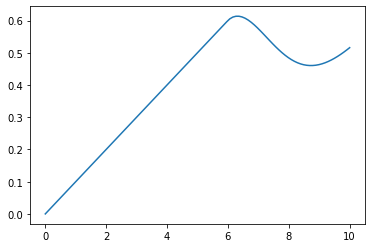

In [166]:
f = plt.plot(xa,alpha(xa))

Now we'll introduce beta, another parameter.

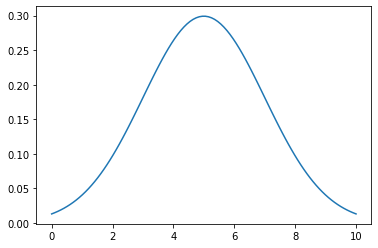

In [191]:
xb = np.linspace(0,10,100)
n1 = st.norm(loc=5.0, scale=2.0)
def beta(y):
    return(1.5 * n1.pdf(y))
f = plt.plot(xb,beta(xb))

In [192]:
xx, yy = np.meshgrid(xa,xb)

In [193]:
z = alpha(xx) + beta(yy)

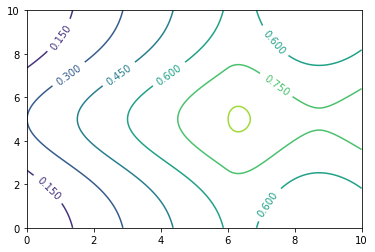

In [194]:
fig, ax = plt.subplots()
CS = ax.contour(xa, xb, z)
l = ax.clabel(CS, inline=1, fontsize=10)

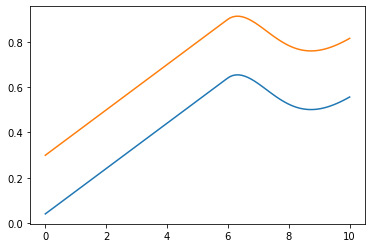

In [196]:
plt.plot(xa,alpha(xa)+beta(9))
plt.plot(xa,alpha(xa)+beta(5))

Now to add a third variable, gamma.

In [179]:
xg = np.linspace(0,10,100)
def gamma(z):
    return((np.exp(0.036*z) - 1.0) * np.cos(2*z/np.pi))

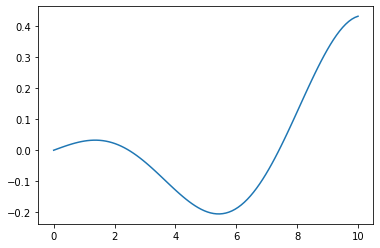

In [180]:
plt.plot(xg, gamma(xg))

# The Response

Now we have our function.

In [181]:
def response(a,b,g):
    out = alpha(a) + beta(b) + gamma(g)
    return(out)

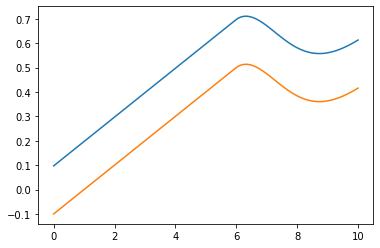

In [184]:
plt.plot(xa,response(xa,8,0))
plt.plot(xa,response(xa,8,5))